# Práctica 1. Parte 2. _Apendicitis_

Instalamos las dependencias de este código en primer lugar (`%%capture` sirve para que no se muestren las salidas de la celda)

In [409]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

warnings.filterwarnings("ignore") # Algunos métodos van a estar obsoletos en futuras versiones

## 1. Enunciado
El objetivo de esta práctica es entrenar una neurona artiﬁcial para que sea capaz de detectar si un paciente puede o menos sufrir de apendicitis.

En primer lugar hay que descargar los archivos appendicitis.dat y muestra\_pacientes.dat de la base de datos keel Dataset ([enlace](https://sci2s.ugr.es/keel/dataset.php?cod=183))

In [411]:
# Carga de los datos del dataset de entrenamiento:
data = pd.read_csv('appendicitis/data.csv')

# Añadimos una columna con unos a la izquierda para el peso que multiplica a x0
data.insert(0, 'unos', 1)

In [412]:
# Dividimos en porcentaje de entrenamiento y prueba:
train_percent = 0.6
test_percent = 1 - train_percent

train_data = data.sample(frac=train_percent)
test_data = data.copy().drop(train_data.index)

Una vez la neurona pueda leer el archivo se pide:

1\. Añadir como opción una función de salida que proceda de f (p) = sin(p) en [−1, 1] con imagen en el intervalo apropiado.

<div style="color: DodgerBlue;">Para obtener los puntos de inflepión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = cos(p)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = -sin(p) = 0</i></center>

Esta ecuación tiene una única solución en [-1, 1] siendo p=0. Por ello podemos concluir que sin(p) tiene un <strong>punto de inflepión en p=0</strong>.</div>

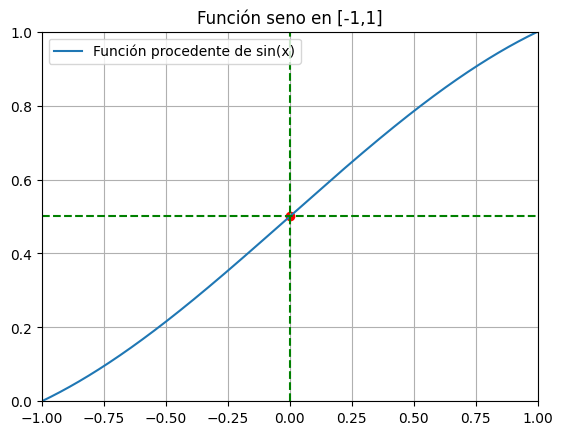

In [413]:
# Función 1
def sin(x):
    """Calcula el seno de un número x, con imagen entre 0 y 1.
    Precondiciones: x ∈ [-1,1]"""
    # Normalización de la imagen al intervalo [0,1]
    return (np.sin(x) - np.sin(-1)) * (1 - 0) / (np.sin(1) - np.sin(-1))

# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-1, 1, 1000)
f_x = sin(x)

plt.plot(x, f_x)
plt.title("Función seno en [-1,1]")
plt.axvline(x=0, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

plt.xlim(-1, 1)
plt.ylim(0, 1)

# Representamos el punto de inflexión en x=0
pto_inflexion = 0
f_pto_inflexion = sin(pto_inflexion)
plt.scatter(pto_inflexion, f_pto_inflexion, color="r")

plt.grid()
plt.legend(["Función procedente de sin(x)"])
plt.show()


2\. Añadir como opción una función de salida que proceda de f(_p_) = 1/(1+ _e_<sup>−p</sup>) en (0, 1), con imagen en el intervalo apropiado

<div style="color: DodgerBlue;">Para obtener los puntos de inflexión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = e^(-p)/(2 e^(-p) + (e^(-p))^2 + 1)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = (-e^(-p) + (e^-p)^2) / (3 e^(-p) + (e^(-p)^3) + 3 (e^(-p)^2) + 1) = 0</i></center>

Esta ecuación no tiene solución en (0, 1), dado que el punto de inflexión más cercano está en p=0, que no pertenece al intervalo. Por ello podemos concluir que f(p) <strong>no tiene puntos de inflexión</strong> en nuestro intervalo.</div>

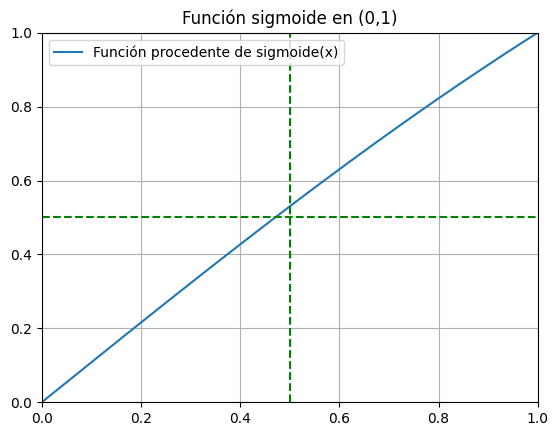

In [414]:
# Función 2
def sigmoide(x):
    """Calcula el valor de la función f(x) = 1/(1 + e^(-x)), con
    imagen entre 0 y 1.
    Precondiciones: x ∈ (0, 1)"""

    # Nótese que sigmoide(0) = 0 y sigmoide(1) = 1, luego no habría problema con esos valores.

    def sig(x):
        return 1 / (1 + np.exp(-x))

    return (sig(x) - sig(0)) * (1 - 0) / (sig(1) - sig(0))


# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(0, 1, 1000)
f_x = sigmoide(x)

plt.plot(x, f_x)
plt.title("Función sigmoide en (0,1)")
plt.axvline(x=0.5, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente de sigmoide(x)"])
plt.show()

3\. Añadir como opción una función de salida que proceda de f (p) = ex p(−p<sup>2</sup>) en (0, 1] con imagen en el
intervalo apropiado

<div style="color: DodgerBlue;">Para obtener los puntos de inflexión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = -2p e^(-p^2)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = -2 e^(-p^2) + 4 p^2 e^(-p^2) = 0</i></center>

Esta ecuación tiene una solución en (0, 1] con p=1/2^(1/2) Por ello podemos concluir que f(p) <strong>tiene un punto de inflexión en p=1/2^(1/2)</strong></div>

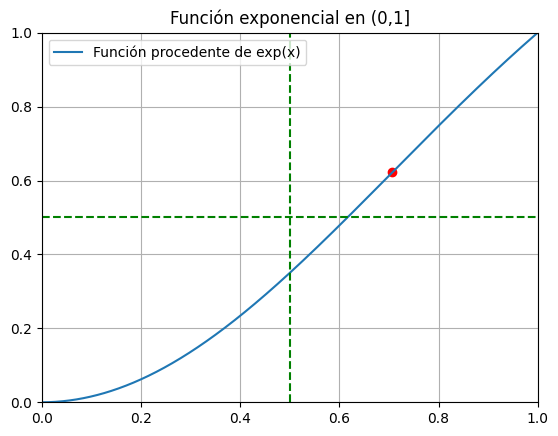

In [415]:
# Función 3
def exponencial(x):
    """Calcula el valor de la función f(x) = e^-(x^2), con imagen entre 0 y 1.
    Precondiciones: x ∈ (0, 1]"""
    
    # Nótese que exponencial(0) = '-0.0' por errores de cómputo, aunque a efectos
    # prácticos es lo mismo que 0 a la hora de sumarlo o restarlo, pero no al tener
    # en cuenta el signo.

    def exp(x):
        return np.exp(-(x**2))

    # Normalización de la imagen al intervalo [0,1]
    return (exp(x) - exp(0)) * (1 - 0) / (exp(1) - exp(0))

# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(0, 1, 1000)
f_x = exponencial(x)

plt.plot(x, f_x)
plt.title("Función exponencial en (0,1]")
plt.axvline(x=0.5, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

# Punto de inflexión
pto_inflexion = 1/math.sqrt(2)
f_pto_inflexion = exponencial(pto_inflexion)
plt.scatter(pto_inflexion, f_pto_inflexion, color="r")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente de exp(x)"])
plt.show()

4\. Añadir como opción una función de salida que proceda de f(_p_) = _p_/(1 + (_p_<sup>2</sup>)) en [−0,5, 0,5], con imagen

<div style="color: DodgerBlue;">Para obtener los puntos de inflexión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = (-p^2 + 1) p / (p^4 + 2p^2 + 1)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = (2p^3 - 6p) / (p^6 + 3p^4 + 3p^2 + 1) = 0</i></center>

Esta ecuación tiene una única solución en [-0.5, 0.5] siendo p=0. Por ello podemos concluir que f(p) tiene un <strong> punto de inflexión en p=0 </strong>.</div>

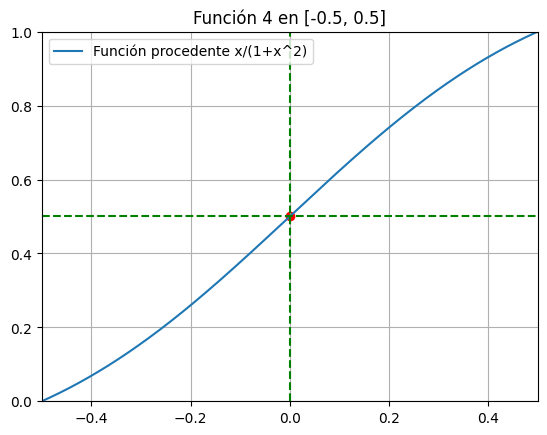

In [416]:
# Función 4
# Ya que no he encontrado un nombre común a esta función, la he llamado 'fun_p'
def fun_p(x):
    """Calcula el valor de la función f(x) = 1/(1 + x^2), con
    imagen entre 0 y 1.
    Precondiciones: x ∈ [-0.5, 0.5]"""

    def p(x):
        return x / (1 + x**2)

    # Normalización de la imagen al intervalo [0,1]
    return (p(x) - p(-0.5)) * (1 - 0) / (p(0.5) - p(-0.5))

# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-0.5, 0.5, 1000)
f_x = fun_p(x)

plt.plot(x, f_x)
plt.title("Función 4 en [-0.5, 0.5]")
plt.axvline(x=0, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

# Representamos el punto de inflexión en x=0
pto_inflexion = 0
f_pto_inflexion = fun_p(pto_inflexion)
plt.scatter(pto_inflexion, f_pto_inflexion, color="r")

plt.xlim(-0.5, 0.5)
plt.ylim(0, 1)

plt.grid()
plt.legend(["Función procedente x/(1+x^2)"])
plt.show()


6\. Añadir la opción de enfriamiento simulado al la razón de aprendizaje. La razón η ha de ser una función decreciente que dependa del tiempo. Por ejemplo η(t) = −1/(1 + exp(−4m(t − c))) + 1 siendo m y c parámetros a ajustar

In [417]:
def aprendizaje(t: int, m: float, c: float) -> float:
    """Calcula la tasa de aprendizaje en función de la iteración, y dos parámetros (m y c)"""
    # Partimos de que la η inicial es 0.1, para ajustar más fácilmente la función entre valores comunes para la tasa de aprendizaje
    return 0.1 * (1 - 1 / (1 + math.exp(-4 * m * (t - c))))


<div style="color: DodgerBlue;">Con unas pocas pruebas de tanteo podemos ver que unos posibles valores para las constantes son m=0.005 y c=-6</div>

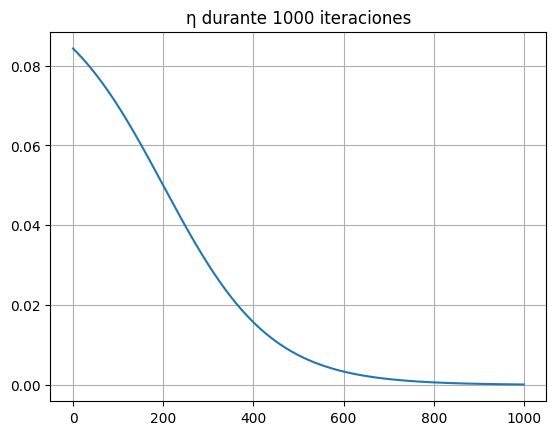

In [418]:
# Representamos el aprendizaje con esos valores:
m = 0.0021
c = 200
t = np.linspace(0,1000,1001)
aprendizaje_x = [aprendizaje(i, m, c) for i in t]

plt.plot(t, aprendizaje_x)
plt.title("η durante 1000 iteraciones")

plt.grid()
plt.show()

7\. Ajustar los valores de los parámetros error aceptable, ratio de aprendizaje y tiempo máximo para obtener un mínimo de 98 muestras bien aproximadas. Escribir las pruebas con las que se ha obtenido la mejor aproximación. Función de salida, t<sub>max</sub>, η(m, c), error normalizado/muestras

In [419]:
# Parámetros aceptables
max_error = 2
max_iter = 1000


# Creamos una funcion para entrenar al perceptron de clasificación:
def entrenar_perceptron(
    train_data,
    max_iter,
    max_error,
    m,
    c,
    fun_activacion: callable,
    porcentaje_activacion,
    enfriamiento_simulado=False,
    eta=0.1,
):
    # Inicializamos los pesos y el sesgo
    w = np.random.rand(1, train_data.shape[1] - 1)

    # Inicializamos el error
    error = math.inf

    # Inicializamos la tasa de aprendizaje
    eta = 0.1

    # Inicializamos la iteración
    iter = 0

    # Creamos un vector para los errores:
    errores = []

    # Mientras no se alcance el error máximo y no se alcance el número máximo de iteraciones
    while error > max_error and iter < max_iter:
        # Inicializamos el error a 0
        error = 0

        if enfriamiento_simulado:
            # Calculamos la tasa de aprendizaje
            eta = aprendizaje(iter, m, c)

        # Iteramos sobre el conjunto de entrenamiento
        for index, row in train_data.iterrows():
            # Extraemos las características y la clase
            x = row[:-1].values
            y = row[-1]

            # Calculamos la salida del perceptrón
            z = np.dot(w, x)
            y_pred = fun_activacion(z)
            clasificacion = 1 if y_pred >= porcentaje_activacion else 0

            # Calculamos el error
            error += np.abs((y - clasificacion))

            # Actualizamos los pesos
            w = w + eta * (y - y_pred) * x

        # Añadimos el error a la lista de errores
        errores.append(error)

        # Incrementamos el número de iteraciones
        iter += 1

    return w, errores, iter

In [420]:
# Evaluamos el entrenamiento con el conjunto de test
def evaluar_perceptron(test_data, w, fun_activacion: callable, porcentaje_activacion):
    # Inicializamos el error
    error = 0

    # Iteramos sobre el conjunto de test
    for index, row in test_data.iterrows():
        # Extraemos las características y la clase
        x = row[:-1].values
        y = row[-1]

        # Calculamos la salida del perceptrón
        z = np.dot(w, x)
        y_pred = fun_activacion(z)
        clasificacion = 1 if y_pred >= porcentaje_activacion else 0

        # Calculamos el error
        error += np.abs((y - clasificacion))

    return error / len(test_data)

Sigmoide:
Pesos: [[ 0.79664161 -0.77312107 -0.08853301 -0.54083011 -1.48666229  1.4893487
   0.02710173 -0.0243693 ]] 	mal clasificados en train: 6.0 de 64
Error con los tests: 0.11904761904761904

Seno:
Pesos: [[ 0.50654088 -0.75443741 -0.15369939 -0.9797792  -2.3971334   2.07274116
   0.27589874 -1.01960252]] 	mal clasificados en train: 6.0 de 64
Error con los tests: 0.11904761904761904

Exponencial:
Pesos: [[-1914.64722589  -837.60590165 -1352.91503959  -871.55520082
   -373.81715761  -322.63078971 -1334.63985942  -791.36225522]] 	mal clasificados en train: 54.0 de 64
Error con los tests: 0.7380952380952381

Fun_p:
Pesos: [[ 0.34317239 -0.875553   -0.02516216 -0.58048502 -1.61963509  1.5599313
   0.07885835 -0.10115665]] 	mal clasificados en train: 6.0 de 64
Error con los tests: 0.11904761904761904



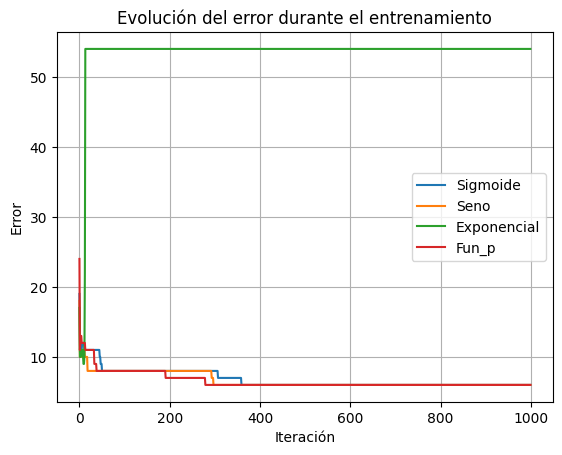

In [428]:
p = 0.5
enfr = True
eta = 0  # Si enfr es True, eta no se usa
# 0.4 con enfriamiento btt bn

w_sig, errores_sigm, iter = entrenar_perceptron(
    train_data, max_iter, max_error, m, c, sigmoide, p, enfr, eta
)
print("Sigmoide:")
print("Pesos:",w_sig ,"\tmal clasificados en train:", errores_sigm[-1],"de", len(train_data))
print("Error con los tests:", evaluar_perceptron(test_data, w_sig, sigmoide, p))
print()

w_sin, errores_sin, iter = entrenar_perceptron(
    train_data, max_iter, max_error, m, c, sin, p, enfr, eta
)
print("Seno:")
print("Pesos:",w_sin ,"\tmal clasificados en train:", errores_sin[-1],"de", len(train_data))
print("Error con los tests:", evaluar_perceptron(test_data, w_sin, sin, p))
print()

w_exp, errores_exponencial, iter = entrenar_perceptron(
    train_data, max_iter, max_error, m, c, exponencial, p, enfr, eta
)
print("Exponencial:")
print("Pesos:",w_exp ,"\tmal clasificados en train:", errores_exponencial[-1],"de", len(train_data))
print("Error con los tests:", evaluar_perceptron(test_data, w_exp, exponencial, p))
print()

w_fun, errores_fun_p, iter = entrenar_perceptron(
    train_data, max_iter, max_error, m, c, fun_p, p, enfr, eta
)
print("Fun_p:")
print("Pesos:",w_fun ,"\tmal clasificados en train:", errores_fun_p[-1],"de", len(train_data))
print("Error con los tests:", evaluar_perceptron(test_data, w_fun, fun_p, p))
print()

# Dibujar evolucion del error
plt.plot(errores_sigm)
plt.plot(errores_sin)
plt.plot(errores_exponencial)
plt.plot(errores_fun_p)
plt.title("Evolución del error durante el entrenamiento")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.legend(["Sigmoide", "Seno", "Exponencial", "Fun_p"])
plt.grid()
plt.show()


<div style="color: DodgerBlue;">Los mejores resultados los he obtenido con los valores anteriores, concretamente con la función de activación 2, aplicando enfriamiento simulado. Dividí el dataset en 60% entrenamiento y 40% test. Nunca obtuve menos de 6 errores durante el entrenamiento, y en cuanto a los tests, el mejor resultado fue un 93% de probabiiidad de acierto.

Sin embargo, no me conformé con eso, y desarrollé el siguiente código para probar una clasificación con un perceptrón de librería, sin ninguna modificación. Los resultados fueron mejores, como se puede ver en la siguiente celda.</div>

In [429]:
# Probamos un perceptron de librería para los datos:
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error

# Entrenamos el perceptrón
perceptron = Perceptron()
perceptron.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

# Calculamos el error cuadrático medio
y_hat = perceptron.predict(train_data.iloc[:, :-1])
error = train_data.iloc[:, -1] - y_hat
print("Fallos en entrenamiento", np.sum(error-y_hat))

# Comparamos los pesos obtenidos con los de nuestra implementación
print("Pesos obtenidos por la librería:", perceptron.coef_)

# Probamos el conjunto de test
y_hat = perceptron.predict(test_data.iloc[:, :-1])
error = test_data.iloc[:, -1] - y_hat
print("Fallos en test", np.sum(error-y_hat), "de", len(test_data), ":", np.sum(error-y_hat)/len(test_data))

Fallos en entrenamiento 2
Pesos obtenidos por la librería: [[ 1.    -2.769 -0.926 -2.736 -3.124 -1.489 -1.099 -2.555]]
Fallos en test 3 de 42 : 0.07142857142857142


8\. utilizar la neurona con la mejor opción para diagnosticar al paciente  = (0,098, 0,607, 0,123, 0,042, 0,016, 0,67, 0,105),(1.1)
si tiene apendicitis (Si/No/Varia) mejor opción: función de salida t<sub>max</sub>, η(m, c) error normalizado/muestras

In [432]:
paciente = [1, 0.098, 0.607, 0.123, 0.042, 0.016, 0.67, 0.105]

print("Sigmoide:", sigmoide(np.dot(w_sig, paciente)), "->", sigmoide(np.dot(w_sig, paciente)) >= p)
print("Seno:", sin(np.dot(w_sin, paciente)), "->", sin(np.dot(w_sin, paciente)) >= p)
print("Exponencial:", exponencial(np.dot(w_exp, paciente)), "->", exponencial(np.dot(w_exp, paciente))>=p,"(no he conseguido que funcione bien)")
print("Fun_p:", fun_p(np.dot(w_fun, paciente)), "->", fun_p(np.dot(w_fun, paciente)) >= p)

# Probamos con un perceptrón de librería
print("Perceptrón de librería:", perceptron.predict([paciente]))

Sigmoide: [0.60813898] -> [ True]
Seno: [0.63492893] -> [ True]
Exponencial: [1.58197671] -> [ True] (no he conseguido que funcione bien)
Fun_p: [0.70635119] -> [ True]
Perceptrón de librería: [0]


<div style="color: DodgerBlue;">Vemos que con los mejores parámetros obtenidos en el punto 7, la neurona clasifica al paciente como que <strong>sí tiene apendicitis</strong>, mientras que el perceptrón de librería lo clasifica como que no tiene apendicitis.</div>